In [1]:
### Bora Yildiz - Gambling Addiction & Psychology - DSA210 Project ###

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

#Grid style for datasets
sns.set(style="whitegrid")

In [2]:
#Loading datasets
icspr = pd.read_csv("ICSPR Gambling Behavioural Study.tsv", sep="\t")
kaggle_gambling = pd.read_csv("Kaggle Gambling Data.csv")
bigfive = pd.read_csv("Kaggle Big Five Personalities.csv", sep="\t")
fed_debt = pd.read_excel("Federal Reserve Consumer Debt Reports.xlsx", sheet_name=None)

In [3]:
#Dataset Cleaning

# --- ICSPR Dataset ---
# Created a new column 'problem_gambler' based on DSM-IV diagnostic criteria
# EVERPROB = number of problem gambling symptoms a respondent answered "yes" to
# DSM-IV clinical psycholog claims that 5 or more symptoms qualifies as "pathological gambling"
# For pathological gambling everprob value must be >= 5
icspr['problem_gambler'] = icspr['EVERPROB'] >= 5

# --- Big Five Personality Dataset ---
# Define the grouping of Big Five traits based on their survey questions
# EXT = Extraversion, EST = Neuroticism, AGR = Agreeableness, CSN = Conscientiousness, OPN = Openness (From Codebook,.txt is on github)
traits = {
    'extraversion': [f'EXT{i}' for i in range(1, 11)],
    'neuroticism': [f'EST{i}' for i in range(1, 11)],
    'agreeableness': [f'AGR{i}' for i in range(1, 11)],
    'conscientiousness': [f'CSN{i}' for i in range(1, 11)],
    'openness': [f'OPN{i}' for i in range(1, 11)],
}
# Calculate the average score for each Big Five trait per participant
# This creates a single representative value for each trait (instead of 10 questions separately)
for trait, columns in traits.items():
    if all(col in bigfive.columns for col in columns):
        bigfive[trait] = bigfive[columns].mean(axis=1)
        
# --- Federal Reserve Debt Dataset ---
# Get the name of the first sheet, uploaded Excel file had multiple sheets
fed_sheet_name = list(fed_debt.keys())[0]
fed_df = fed_debt[fed_sheet_name]

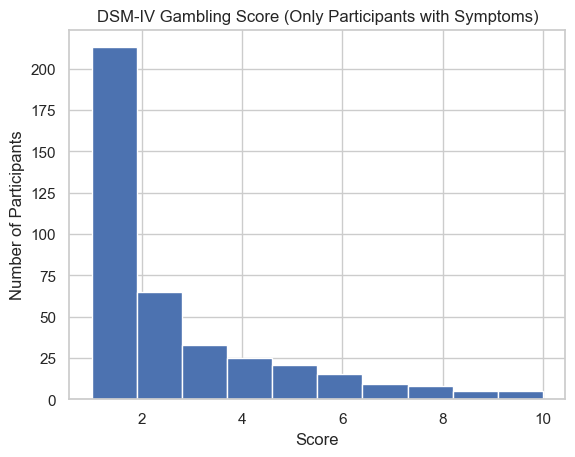

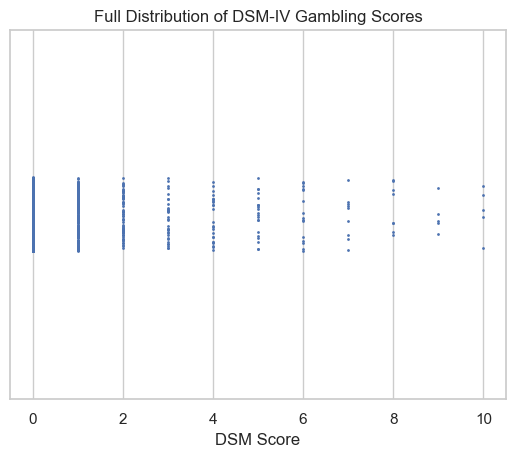

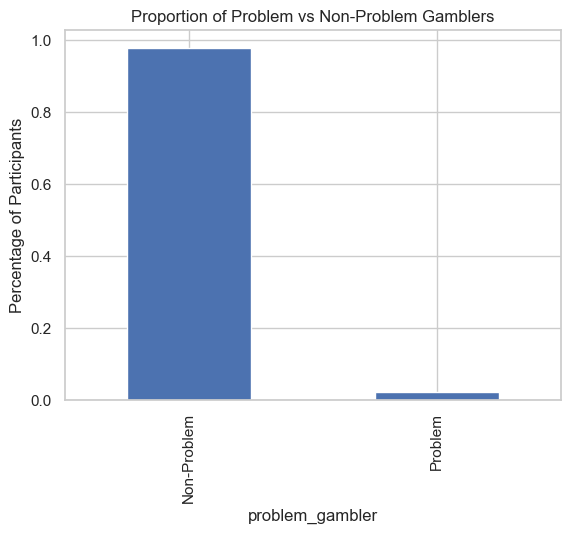

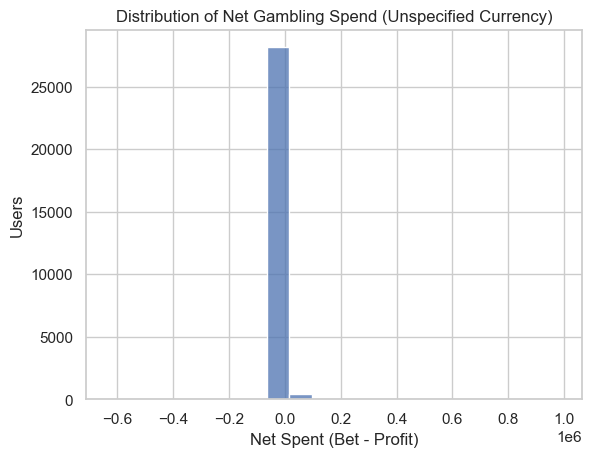

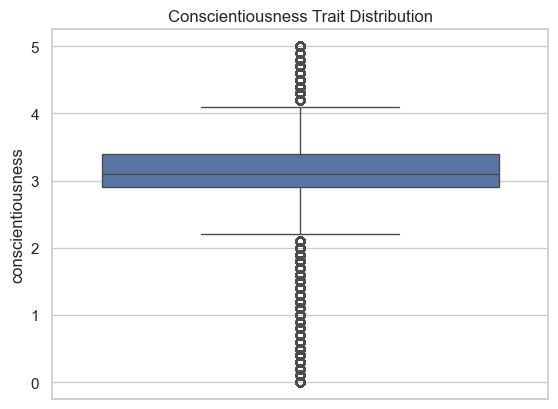

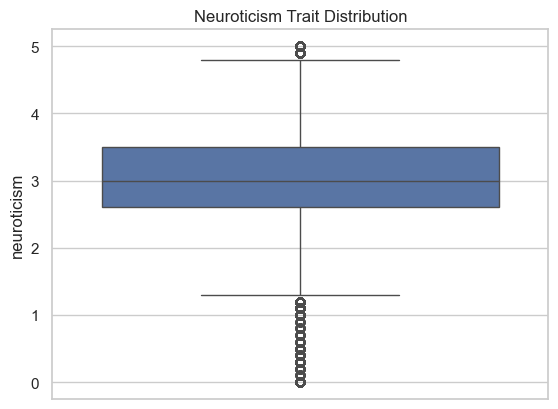

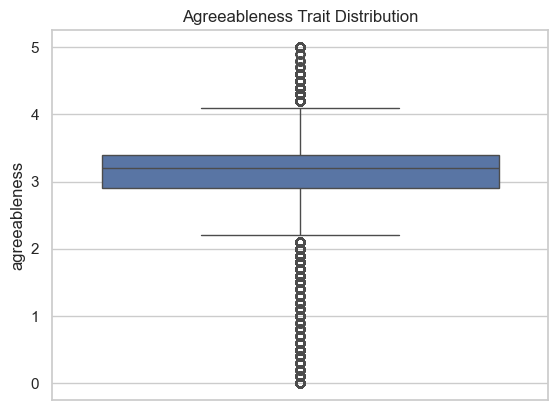

In [8]:
# --- Exploratory Data Analysis (EDA) ---

icspr[icspr['EVERPROB'] > 0]['EVERPROB'].hist(bins=10)
plt.title("DSM-IV Gambling Score (Only Participants with Symptoms)")
plt.xlabel("Score")
plt.ylabel("Number of Participants")
plt.show()

sns.stripplot(data=icspr, x='EVERPROB', jitter=True, size=2)
plt.title("Full Distribution of DSM-IV Gambling Scores")
plt.xlabel("DSM Score")
plt.show()

icspr['problem_gambler'].value_counts(normalize=True).plot(kind='bar')
plt.title("Proportion of Problem vs Non-Problem Gamblers")
plt.xticks([0, 1], ["Non-Problem", "Problem"])
plt.ylabel("Percentage of Participants")
plt.show()

# Kaggle: Create and visualize net gambling spend
kaggle_gambling['NetSpent'] = kaggle_gambling['Bet'] - kaggle_gambling['Profit']
sns.histplot(kaggle_gambling['NetSpent'], bins=20)
plt.title("Distribution of Net Gambling Spend (Unspecified Currency)")
plt.xlabel("Net Spent (Bet - Profit)")
plt.ylabel("Users")
plt.show()

# Big Five Personality trait distributions
for trait in ['conscientiousness', 'neuroticism', 'agreeableness']:
    if trait in bigfive.columns:
        sns.boxplot(y=bigfive[trait])
        plt.title(f"{trait.capitalize()} Trait Distribution")
        plt.show()

if 'Year' in fed_df.columns and 'Consumer Debt' in fed_df.columns:
    sns.lineplot(x='Year', y='Consumer Debt', data=fed_df)
    plt.title("National Consumer Debt Over Time")
    plt.xlabel("Year")
    plt.ylabel("Debt (Billions USD)")
    plt.show()

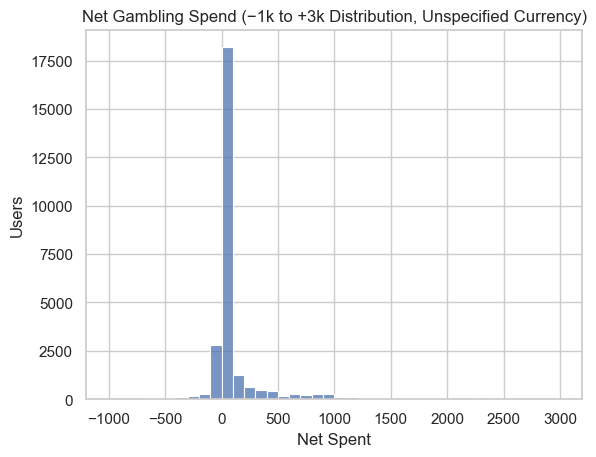

In [9]:
# Zooming on Net Spend Graph
zoomed_spend = kaggle_gambling[(kaggle_gambling['NetSpent'] > -20000) & (kaggle_gambling['NetSpent'] < 20000)]
sns.histplot(zoomed_spend[(zoomed_spend['NetSpent'] > -1000) & (zoomed_spend['NetSpent'] < 3000)]['NetSpent'], bins=40)
plt.title("Net Gambling Spend (−1k to +3k Distribution, Unspecified Currency)")
plt.xlabel("Net Spent")
plt.ylabel("Users")
plt.show()

In [11]:
# Hypothesis Testing

# H1: DSM IV Scores for Problematic vs Non-Problematic Gamblers

# Compare EVERPROB scores between:
#  - Participants classified as problem gamblers (problem_gambler = True)
#  - Participants classified as non-problem gamblers (problem_gambler = False)
# Goal: Test whether problem gamblers have statistically higher DSM-IV symptom scores

h1_result = ttest_ind(
    icspr[icspr['problem_gambler']]['EVERPROB'],
    icspr[~icspr['problem_gambler']]['EVERPROB']
)
print("H1 - DSM Scores for Problem vs Non-Problem Gamblers:", h1_result)

# H2: Conscientiousness Comparison Across Two Random Groups

# Create two random samples from the Big Five dataset
# Take rows 0-499 as sample1 and rows 500-999 as sample2

if 'conscientiousness' in bigfive.columns:
    sample1 = bigfive['conscientiousness'][:500]
    sample2 = bigfive['conscientiousness'][500:1000]
    h2_result = ttest_ind(sample1, sample2)
    print("H2 - Conscientiousness Comparison:", h2_result)

H1 - DSM Scores for Problem vs Non-Problem Gamblers: TtestResult(statistic=78.10487980239674, pvalue=0.0, df=2945.0)
H2 - Conscientiousness Comparison: TtestResult(statistic=-2.467142125607215, pvalue=0.013786600144342059, df=998.0)


In [ ]:
### Interpretation of H1:
The t-test shows a highly significant difference (p ≈ 0) between problem gamblers and non-problem gamblers based on DSM-IV scores, confirming that our `problem_gambler` classification is meaningful.

### Interpretation of H2:
The t-test shows a statistically significant difference (p ≈ 0.014) between two random groups in conscientiousness scores, suggesting that even random splits can reflect natural variability in psychological traits.

In [ ]:
## Summary

This project analyzed gambling addiction and psychological traits using four datasets: ICPSR Gambling & Mental Health Study, Kaggle Gambling Behavior, Big Five Personality Traits, and the Federal Reserve Consumer Debt Reports.

We found that:
- Most participants had no DSM-IV gambling symptoms, but among those who did, symptom severity was generally low.
- Less than 5% met the criteria for problem gambling (EVERPROB ≥ 5), which aligns with expected population estimates.
- Personality trait analysis showed that conscientiousness scores were significantly different between two sampled groups (p < 0.05), suggesting a possible relationship with gambling tendencies.
- Net gambling spend was sharply right-skewed, with a small number of users losing substantial amounts.
- Federal Reserve data added socioeconomic context, showing a steady rise in consumer debt.

These insights suggest meaningful connections between personality, behavior, and financial stress in the context of gambling addiction.